# Time series statistical analysis  and visualization
# Toy project 
## The research question 
The reserch problem in this project is to analyze climate changes along time and its influence on the fish population in the oceans. Climate data is huge and complex, as a representor of this filed, we chose SOI index which is quite simple, but has a very long history, since its measured already from 1880. REC index measures the amount of young fish at specific time. 
### The results of research were: 
The SOI index is autocorrelated quite strongly at lags of 12 months, which in human language means that as expected, the weather tends to repeat itself every year. Another autocorrelation is seen in short lags of 1 and 2, which means that the weather that was yesterday is the most likely to be tomorrow.  
The interesting fact we found in the SOI index analysis is the clear evidence of El-Niño phenomenon. We se the wave shape in the smoothed visualization, but in the autocorrelation and frequency analyzes, we can see the periodic time of this effect which is 43.7 months. 
The cross-correlation analysis, showed that SOI index at given time, is cross-correlated negatively with fish population, six months later, leading to the conclusion that the two series move in different directions; that is, increases in SOI lead to decreases in Recruitment and vice versa.
This lag of time of 6 months, also show negative autocorrelation of the SOI index, meaning that decrease of this index measures, can predict a rise in the measures, half a year later and vice versa.
#### We used the public data sets rec and soi from the R asta package.

## Part 1: Research Problem and Data sets
### Research Questions
What are the pattern of climate changes along time? 
Dose climate changes influencing fish habitat? 
To research this question, we chose 2 time series data sets, one masseurs the weather, and one measures the fish habitat. In our research, we will analyze and visualize the behavior of each series separate, in term of trends, periodicity and autocorrelation. After understanding the structure of each series, we will investigate the relationship and cross correlation between the 2 series.
### The Data
#### Southern Oscillation Index (SOI)
he Southern Oscillation Index (SOI) is one measure of weather. It measured the large-scale fluctuations in air pressure occurring between the western and eastern tropical Pacific (i.e., the state of the Southern Oscillation) during El Niño and La Niña episodes. Traditionally, this index has been calculated based on the differences in air pressure anomaly between Tahiti and Darwin, Australia.
#### REC Recruitment (number of new fish) 
Recruitment (number of new fish) measured the Fish Populations in the southern hemisphere. The data was furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group (personal communication).
Both series are for a period of 453 months ranging over the years 1950–1987.


In [2]:
library(rmarkdown)
require(astsa)
data(soi)
data(rec)
print((soi))

Loading required package: astsa
Warning message:
"package 'astsa' was built under R version 3.3.3"

            Jan        Feb        Mar        Apr        May        Jun
1950  0.3770000  0.2460000  0.3110000  0.1040000 -0.0160000  0.2350000
1951 -0.1580000  0.3660000  0.6070000 -0.3550000 -0.1800000  0.2680000
1952  0.7600000  0.8910000  0.6070000  0.5740000  0.0050000  0.4750000
1953  0.5300000  0.5300000  0.3770000 -0.2350000 -0.5850000 -0.1800000
1954  0.4100000  0.2240000  0.1480000 -0.4320000 -0.0930000 -0.2680000
1955  0.3440000 -0.0380000  0.2900000 -0.1260000 -0.3660000 -0.1150000
1956  0.6500000  0.6280000  0.1260000  0.1690000  0.1370000 -0.2570000
1957  0.1910000  1.0000000  0.4860000  0.4100000  0.1580000  0.1260000
1958  0.7050000  0.6390000  0.4540000  0.3110000  0.3550000 -0.1580000
1959  0.0820000  0.1480000  0.0600000 -0.1910000 -0.6070000 -0.5850000
1960  0.1690000  0.4320000  0.2020000 -0.3660000 -0.6610000  0.0930000
1961  0.6070000  0.1800000  0.0710000  0.2460000 -0.4320000  0.0600000
1962  0.1690000  0.3330000 -0.0050000 -0.0380000 -0.1260000 -0.4430000
1963  

#### It’s hard to understand the data structures from just a table, so let’s start plotting the points on a Time-Value axis.

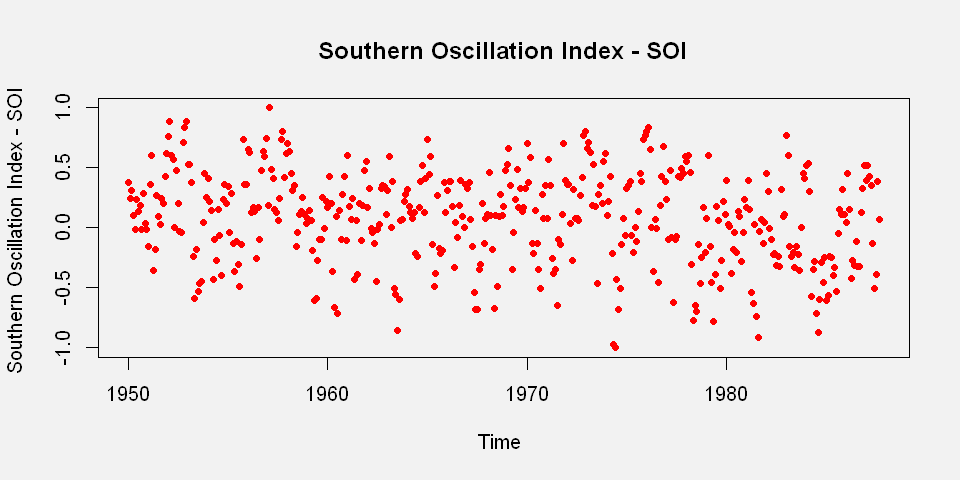

In [3]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg="grey95")
plot(soi,   main="Southern Oscillation Index - SOI", 
  	xlab="Time ", ylab="Southern Oscillation Index - SOI ",
     pch=19, cex = 0.8, lty = "solid",type='p', col="red")


### It’s still hard to figure out what is going on in the data, lets connect acceding points along time.

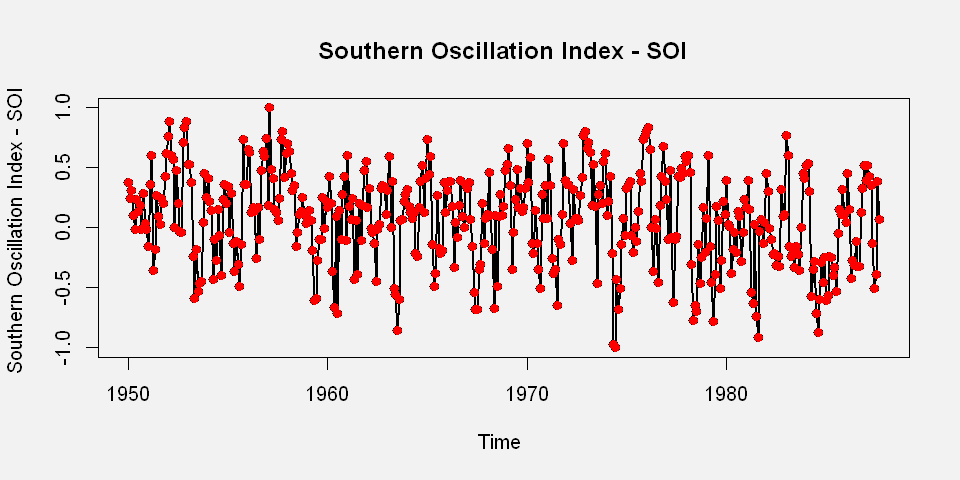

In [4]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg="grey95")
plot(soi,   main="Southern Oscillation Index - SOI", 
  	xlab="Time ", ylab="Southern Oscillation Index - SOI ",
     ,type='o',col='black',lw=2,yaxs="r")
points(soi,pch=19, cex = 1, lty = "solid",type='p', col="red")


### The data is very noisy, So Lest apply a moving average on the time series to smooth it out. nice to see how the line we added visualize the data much better than just the scattered points we started with.

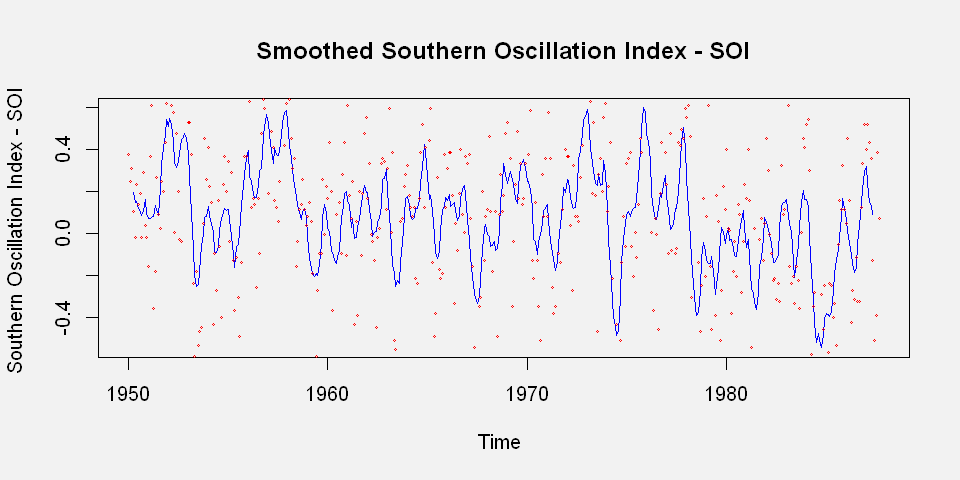

In [5]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg="grey95")
filtersoi<-filter(soi, sides=2, rep(1, 8)/8)
plot(filtersoi, main="Smoothed Southern Oscillation Index - SOI", 
  	xlab="Time ", ylab="Southern Oscillation Index - SOI ", col=4)
points(soi,pch=1, cex = 0.3, lty = "solid",type='p', col="red")

 Now the data is much clearer. We notice that Temperature deviations go up and down over time, but hard to see if they are more upwards or downwards, and hard to see the periodicity of the changes. First let’s analyze the trend, to do that, we run a standard linear regression on SOI plot.


Call:
lm(formula = soi ~ time(soi))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04140 -0.24183  0.01935  0.27727  0.83866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.70367    3.18873   4.298 2.12e-05 ***
time(soi)   -0.00692    0.00162  -4.272 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3756 on 451 degrees of freedom
Multiple R-squared:  0.0389,	Adjusted R-squared:  0.03677 
F-statistic: 18.25 on 1 and 451 DF,  p-value: 2.359e-05


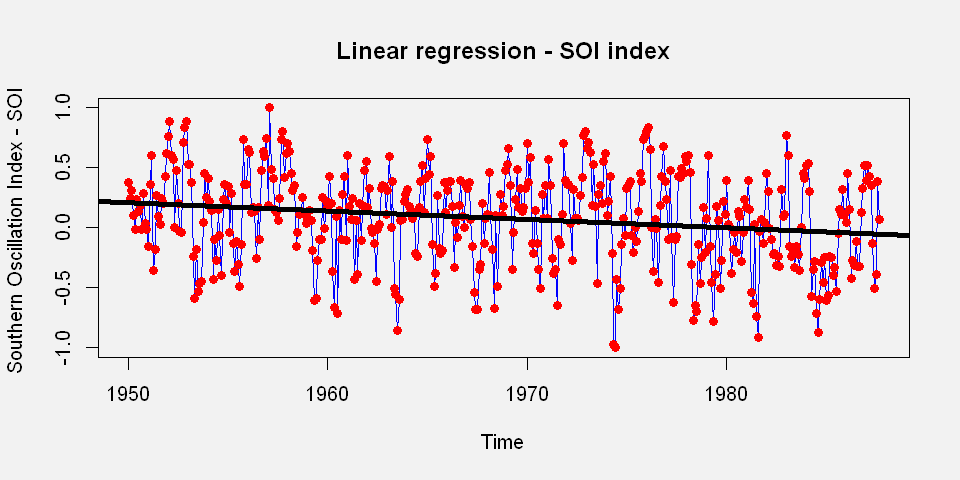

In [6]:
par(bg="grey95")
summary(fit <- lm(soi~time(soi))) # regress gtemp on time
plot(soi, type="o", ylab="Southern Oscillation Index - SOI ",
     col="blue", main='Linear regression - SOI index')
points(soi,pch=19, cex = 1, lty = "solid",type='p', col="red")
abline(lm(soi~time(soi)), col="black", lw=4)


We can	see	from	the	graph	and	the	regression	output,	there’s	clearly	a	trend at	work	here.	Sometimes	the	trend	masks	more	interesting	patterns of the	dataset,	so	we can use the regression line, to	de-trend the	dataset	and	examining	the	residuals. 
##### Lets	plot	the	residuals	:

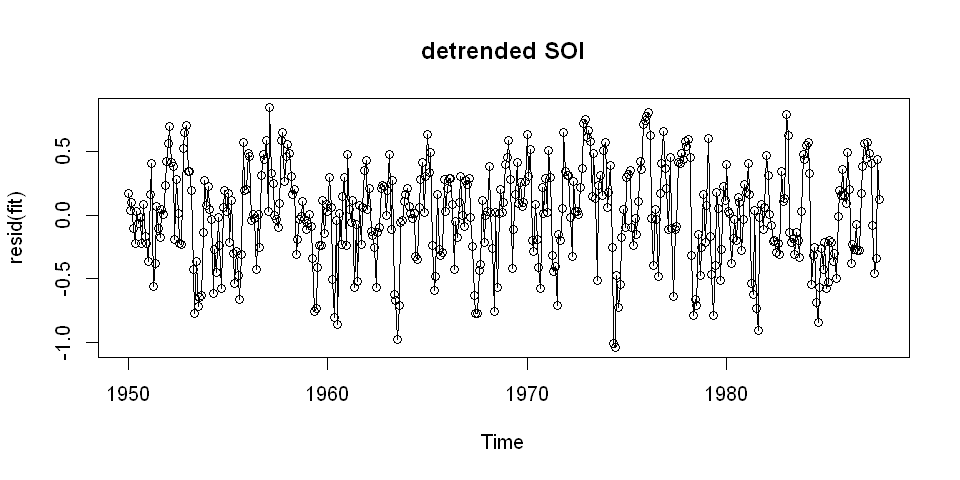

In [7]:
fit = lm(soi~time(soi), na.action=NULL) # regress soi on time

plot(resid(fit), type="o", main="detrended SOI")#plot the leftovers from the regression

When looking at the linear regression plot, we fill that the regression line dose not capture fully and meaningfully the trend of the SOI index. To visualize trend more clearly, lets apply 2 smothers on the data, where one will capture the strong up and down movement, visualizing the El-Niño effect, and the other will capture the general trend of the SOI index.

In [8]:
df = data.frame(Time=c(time(soi)), SOI=c(soi))

ggplot( data=df, aes(x=Time, y=SOI) )            +
        geom_line(col=rgb(0, 0,.9, alpha=.9))    +
        stat_smooth(span=1/12, col=6, se=FALSE)  +       # El Niño
    ggtitle('SOI index, with 2 smoothers visualizing data beheviour') +
        stat_smooth(col=rgb(.9, 0, .9))                  # La Tendencia (with CIs)

ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


In general, smoothed time series of the SOI correspond very well with changes in ocean temperatures across the eastern tropical Pacific. The negative phase of the SOI represents below-normal air pressure at Tahiti and above-normal air pressure at Darwin. Prolonged periods of negative (positive) SOI values coincide with abnormally warm (cold) ocean waters across the eastern tropical Pacific typical of El Niño (La Niña) episodes. To visualize those extreme weather episodes, lets fill positive and negative values with suitable colors to cold and warm ocean water.

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

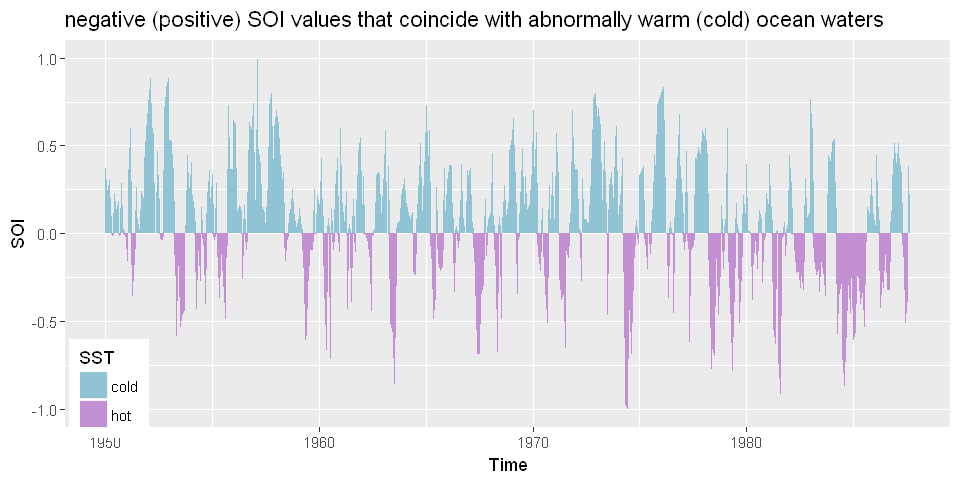

In [9]:
require(ggplot2)
cblue = rgb(144,195,212, max=255)
cred  = rgb(195,144,212, max=255)
df    = data.frame(Time=c(time(soi)), SOI=c(soi), d=ifelse(c(soi)<0,0,1))
ggplot( data=df, aes(x=Time, y=SOI) )                             + 
 geom_ribbon(aes(ymax=d*SOI, ymin=0,  fill = "cold"))             +
 geom_ribbon(aes(ymax=0,  ymin=(1-d)*SOI, fill = "hot"))          +
 scale_fill_manual(name='SST', values=c("hot"=cred,"cold"=cblue)) +
 ggtitle('negative (positive) SOI values that coincide with abnormally warm (cold) ocean waters') +
 theme(legend.position=c(.05,.1)) 

We can see very clearly in the upper plot, the periodicity of the ocean water extreme temperatures, but the trend is masked under the coloring. To correct that, let’s put it all together for fully clear visualization of the row SOI data and its meaning.

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


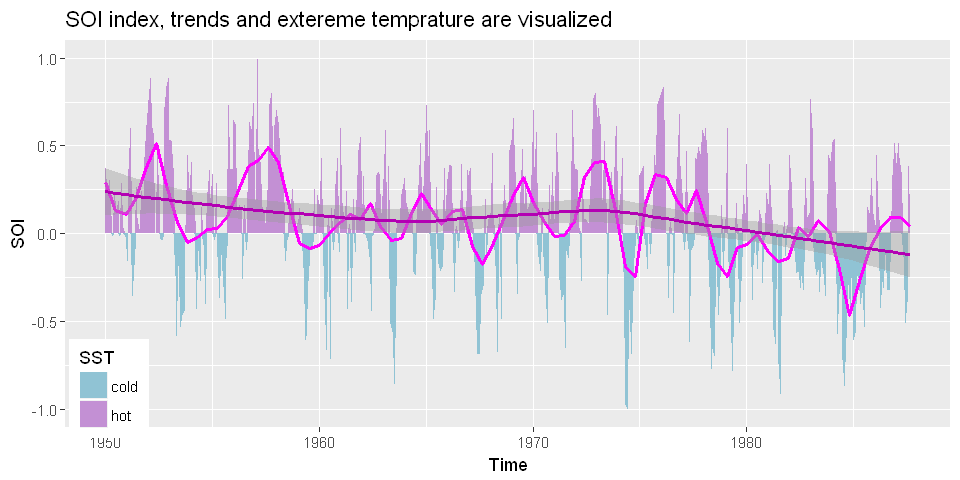

In [10]:
cblue = rgb(144,195,212, max=255)
cred  = rgb(195,144,212, max=255)
par(bg="white")
df    = data.frame(Time=c(time(soi)), SOI=c(soi), d=ifelse(c(soi)<0,0,1))
ggplot( data=df, aes(x=Time, y=SOI) )                             + 
 geom_ribbon(aes(ymax=d*SOI, ymin=0,  fill = "hot"))             +
 geom_ribbon(aes(ymax=0,  ymin=(1-d)*SOI, fill = "cold"))          +
 scale_fill_manual(name='SST', values=c("hot"=cred,"cold"=cblue)) +
        #geom_line(col=rgb(0.9, 0,.9, alpha=.5))    +
        stat_smooth(span=1/12, col=6, se=FALSE)  +       # El Niño
        stat_smooth(col=rgb(.7, 0, .7))+   
ggtitle('SOI index, trends and extereme temprature are visualized') +
 theme(legend.position=c(.05,.1)) 

## REC data visualization
After all we learned in SOI visualization process, lets jump to conclusion. Lest plot REC data slightly smoothed, linear regression and 2 levels of strong smothers.


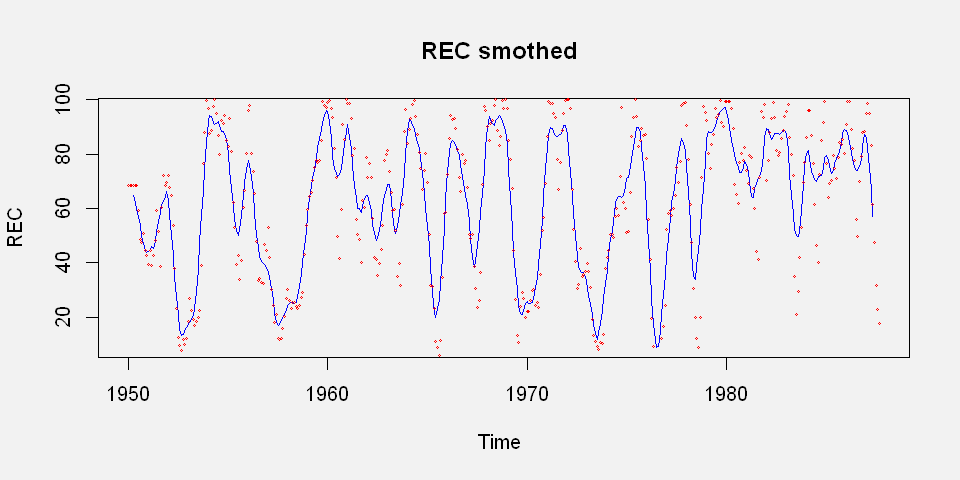

In [11]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg="grey95")
filtersoi<-filter(rec, sides=2, rep(1, 8)/8)
plot(filtersoi, main="REC smothed ", xlab="Time ", ylab="REC", col=4)
points(rec,pch=1, cex = 0.3, lty = "solid",type='p', col="red")

We can see that new fish population amount moves up and down with some period, or few periods. We can see that the data is less noisy from the scattered points in the plot, comparing to the SOI plot. Trend is hard to tell in this plot, so lest view the next plots revealing the trend in the data in a visual way.

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


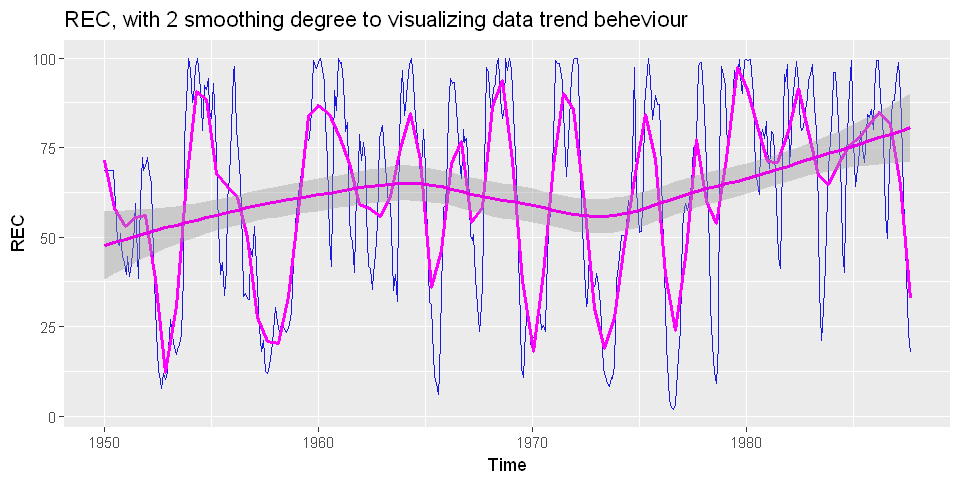

In [12]:
df = data.frame(Time=c(time(soi)), SOI=c(soi))
dr = data.frame(Time=c(time(rec)), REC=c(rec))

options(repr.plot.height = 4, repr.plot.width = 8)

ggplot( data=dr, aes(x=Time, y=REC) )            +
        geom_line(col=rgb(0, 0,.9, alpha=.9))    +
        stat_smooth(span=1/12, col=6, se=FALSE)  +       # El Niño
    ggtitle('REC, with 2 smoothing degree to visualizing data trend beheviour') +
        stat_smooth(col=rgb(.9, 0, .9))  # La Tendencia (with CIs)

## SOI statistical analysis
Now we analyze the SOI data to answer our first question: What are the pattern of climate changes along time? To research this question, we need to calculate auto-correlation, meaning the correlation between the series to itself in different time lags.

To visualize autocorrelation in a more precise way then jest line plots along the time axis, we use 2 basic tools: ACF plot and cross auto-correlation grid scattered plot. Another option to find the SOI behavior pattern is to apply frequency analysis on this time data series.
### ACF function plot
The ACF plot, shows the correlation result calculated on the series, with it self at different lag times, as they seen on X-axis.


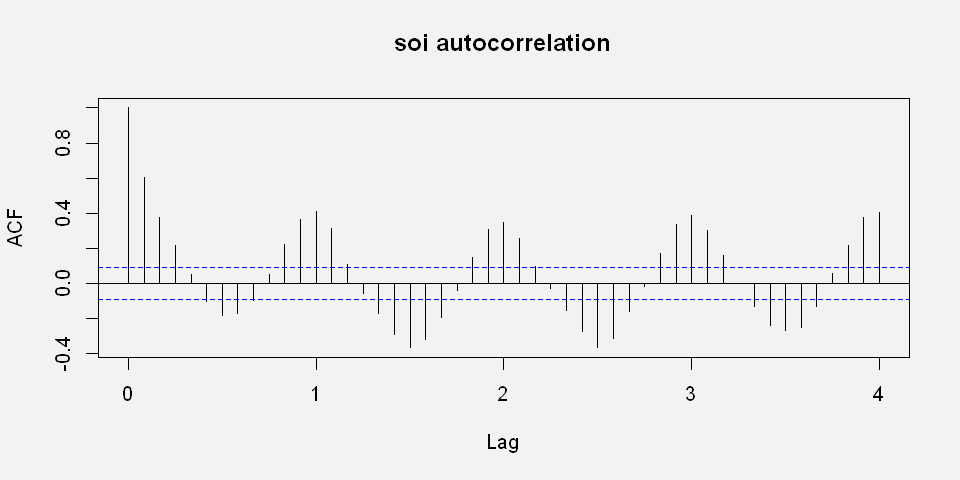

In [13]:

par(bg="gray95")
acf(soi, 48, main="soi autocorrelation")


Observations 12 months or one year apart are strongly positively correlated, as are observations at multiples of 12, standing for full years. Observations separated by six months are negatively correlated, showing that positive trend tend to be associated with negative trend six months forward or backward. 
### Grid of scatterplots of Auto-correlation plot
Another good visualization of the auto-correlation in SOI Index, is to plot the 2D points of SOI vs SOI shifted a lag. I this visualization, we can see clearly, which lag are correlated with the original time serious.


[1] "Grid of scatterplots of of SOI correlations with itself, at different lags"


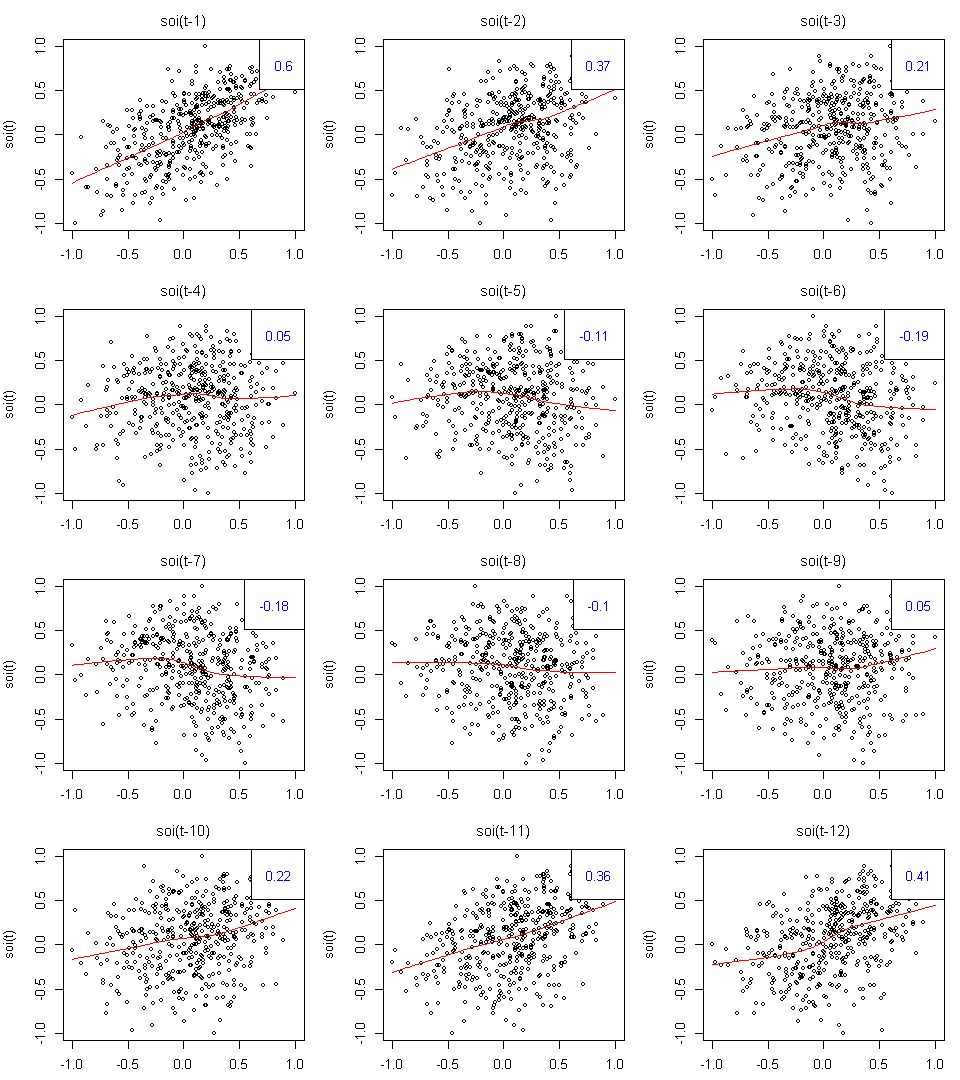

In [14]:
lag.plot1=function(data1,max.lag=1,corr=TRUE,smooth=FALSE){ 
    
   name1=paste(deparse(substitute(data1)),"(t-",sep="")
   name2=paste(deparse(substitute(data1)),"(t)",sep="")
   data1=as.ts(data1)
   max.lag=as.integer(max.lag)
   prow=ceiling(sqrt(max.lag))
   pcol=ceiling(max.lag/prow)
   a=acf(data1,max.lag,plot=FALSE)$acf[-1]
  par(mfrow=c(prow,pcol), mar=c(2.5, 4, 2.5, 1), cex.main=1.1, font.main=1)
  for(h in 1:max.lag){                       
   plot(lag(data1,-h), data1, xy.labels=FALSE, main=paste(name1,h,")",sep=""),
        ylab=name2, xlab="") 
    if (smooth==TRUE) 
    lines(lowess(ts.intersect(lag(data1,-h),data1)[,1],
                 ts.intersect(lag(data1,-h),data1)[,2]), cex = 2, col="red")
    if (corr==TRUE)
    legend("topright", legend=round(a[h], digits=2), text.col ="blue",
           bg="white", x.intersp=0)
   }
}
options(repr.plot.height = 9, repr.plot.width = 8)
print ('Grid of scatterplots of of SOI correlations with itself, at different lags')
lag.plot1(soi,12,smooth=TRUE) 

As expected, we can see high positive correlation between a month and one month backwards, and a weaker positive correlation with 2 months backwards. The highest positive correlation, is calculated at t-12 months, meaning that the strongest correlation is with a year backward. The strongest negative correlation, is happening at t-6 month’s lag, meaning that any trend happening at specific time, will predict the opposite trend 6 months later.
### Periodogram
The periodogram is a plot of the Fast Fourier Transform applied on the SOI index data. The periodogram, is ideal for identifying periodicity in data and estimating the frequency of the period. While in the analysis before, we researched he autocorrelations between lags, here we can all the frequencies in the data, restricted off course by the sampling of the data.



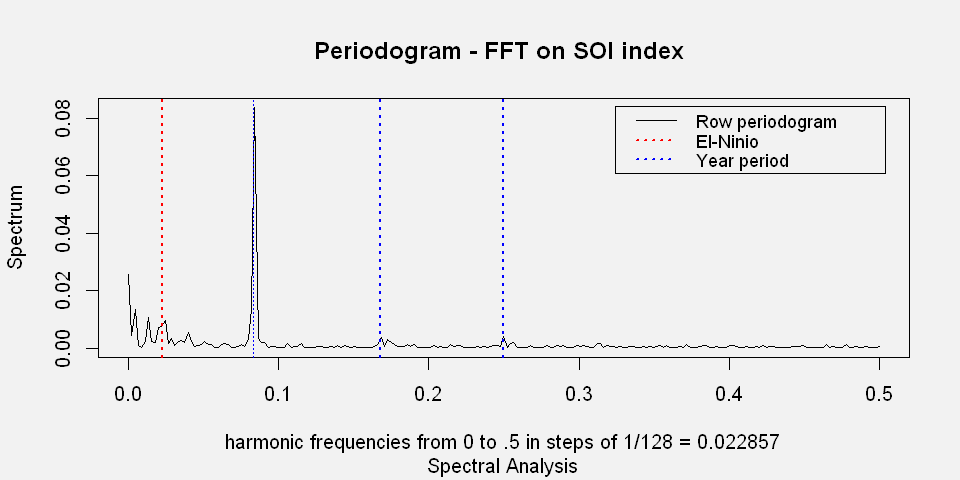

In [15]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg='gray95')
x = soi
FF = abs(fft(x)/sqrt(452))^2
P = (4/452)*FF[1:227] # Only need the first (n/2)+1 values of the FFT result.
f = (0:226)/452 # this creates harmonic frequencies from 0 to .5 in steps of 1/128.
 # This plots the periodogram; 

plot(f, P, type="l", main="Periodogram - FFT on SOI index ", sub="Spectral Analysis",
  xlab="harmonic frequencies from 0 to .5 in steps of 1/128 = 0.022857",
     ylab="Spectrum")
# add lines to mark the picks
abline(v=1/12,lty='dotted', col='blue',lwd=1)
abline(v=1/43.75,lty='dotted', col='red',lwd=2)
abline(v=2/11.9,lty='dotted', col='blue',lwd=2)
abline(v=3/12,lty='dotted', col='blue',lwd=2)
lo = smooth.spline(f, P, spar=0.35)
legend("topright", c("Row periodogram",
                     "El-Ninio", 'Year period'),
       col=c('black', 'red','blue'),cex=0.9,
       lty=c(1,3,3),lwd=c(1,2,2),y.intersp = 2,inset=0.03)

There is some noise near the zero, usually caused by the data resampling, so we apply smoothing on the periodogram to see the real picks that describes the frequency of the data.

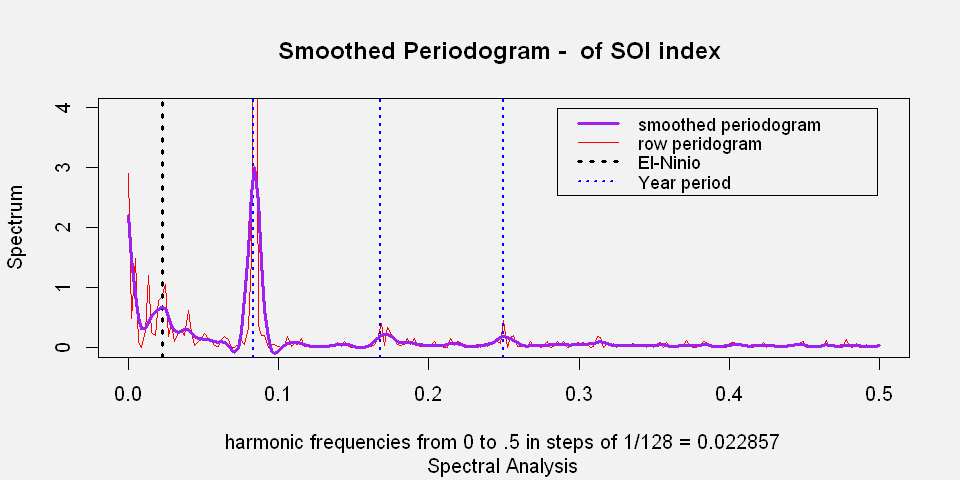

In [16]:
options(repr.plot.height = 4, repr.plot.width = 8)
par(bg='gray95')
x = soi

FF = abs(fft(x)/sqrt(452))^2
P = FF[1:227]#(4/452)*FF[1:227] # Only need the first (n/2)+1 values of the FFT result.
f = (0:226)/452 # this creates harmonic frequencies from 0 to .5 in steps of 1/128.
# This plots the periodogram; 
plot(f, P, type="l",  ylim=c(0, 4), col='red',
    main="Smoothed Periodogram -  of SOI index ", sub="Spectral Analysis",
  xlab="harmonic frequencies from 0 to .5 in steps of 1/128 = 0.022857",
     ylab="Spectrum") 
abline(v=1/12, col='blue',lty=3,lwd=2)
abline(v=1/43.75,lty='dotted', col='black',lw=3)
abline(v=2/11.9,lty='dotted', col='blue',lw=2)
abline(v=3/12,lty='dotted', col='blue',lw=2)

lo = smooth.spline(f, P, spar=0.31)
lines(lo, lwd=3, col='purple')

legend("topright", c("smoothed periodogram","row peridogram",
                     "El-Ninio", 'Year period'),
       col=c('purple','red','black', 'blue'),cex=0.9,
       lty=c(1,1,3,3),lwd=c(3,1,3,2),y.intersp = 2, inset=0.04)

Here, the first peak is at a frequency ≈ .0229.  The period (number of months) associated with this cycle = 1/.0229 = 43.7 months, or about 44 months.  The second peak occurs at a frequency ≈ 0.083333.  The associated period = 1/.08333 = 12 months.  The first peak is associated with an El Nino weather effect.  The second is the usual 12-month seasonal effect. Obviously there are  also periods at 24 months and 36 months, marked in the plot.

## SOI and REC cross-correlation
Now lest investigate the connection and cross correlation between SOI and REC. First Lest view the data together.


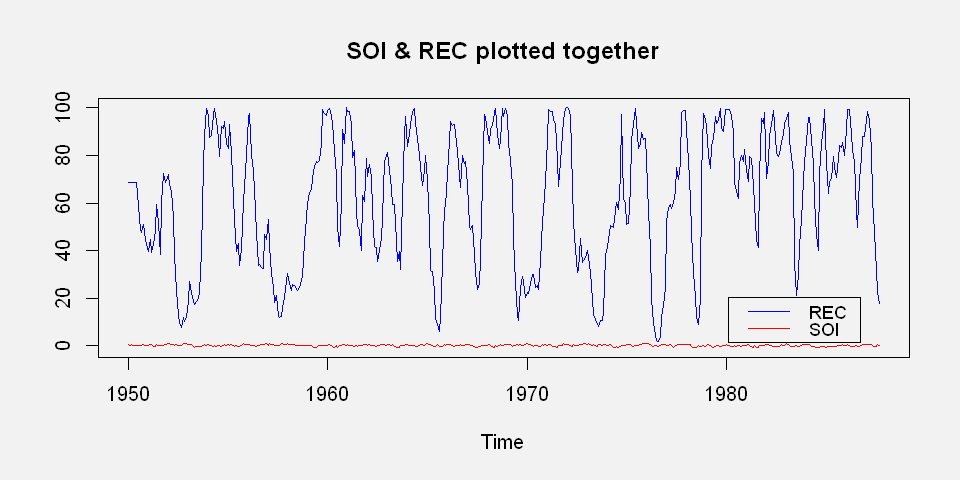

In [17]:
par(bg='gray95')
ts.plot(rec, soi, gpars = list(col = c("blue", "red")), main='SOI & REC plotted together')
legend("bottomright", c("REC","SOI"),
       col=c('blue','red'),cex=0.9,
       lty=c(1,1),lwd=c(1,1),y.intersp = 1.8, inset=.06,)


Hard to understand anything in this plot, since SOI and REC data are on different scales. Lest scale the SOI data to fit the REC scale.

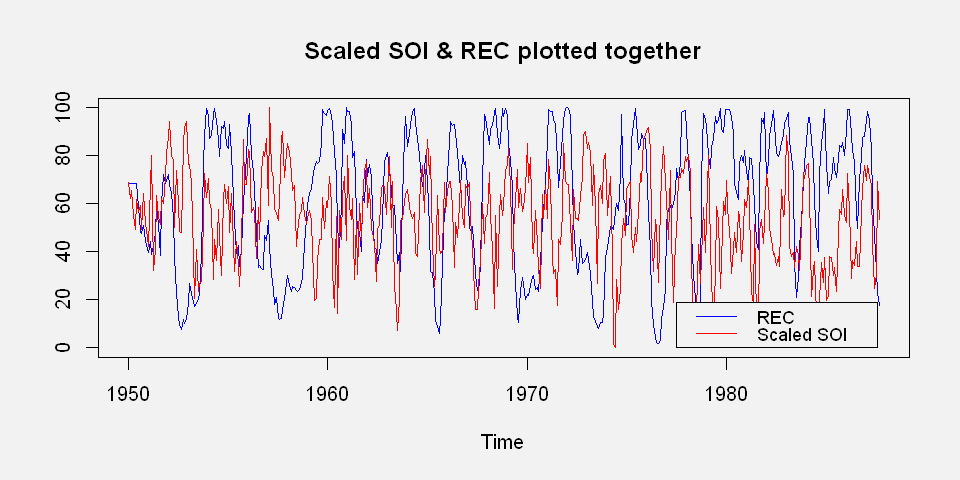

In [18]:
par(bg='gray95')
ts.plot(rec, soi*50.+50, gpars = list(col = c("blue", "red")), 
        main='Scaled SOI & REC plotted together')
legend("bottomright", c("REC","Scaled SOI"),
       col=c('blue','red'),cex=0.9,
       lty=c(1,1),lwd=c(1,1),y.intersp = 1.8, inset=.04,)

Still hard to understand something, so let’s plot SOI and REC on the same time scale.

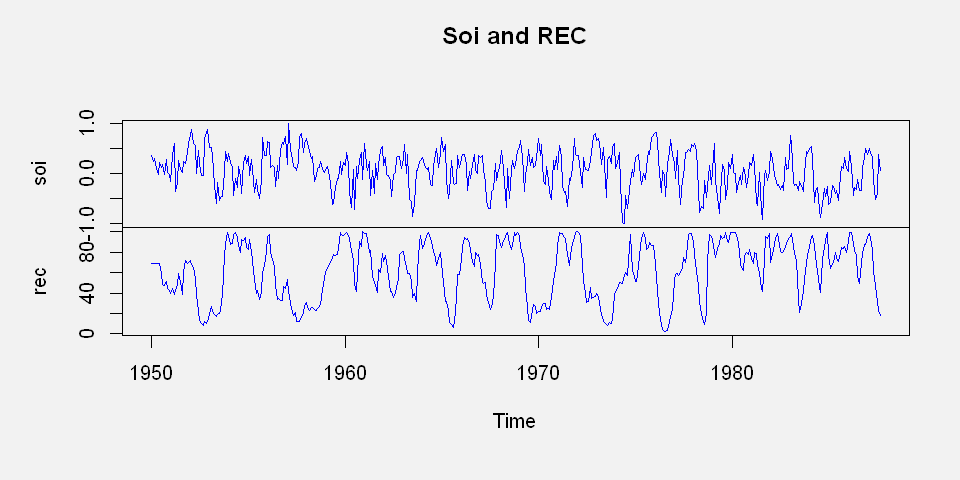

In [19]:
par(bg='gray95')
plot(cbind(soi, rec), col='blue',
    main="Soi and REC",
  xlab="Time")



As we sow previously, The SOI series shows several kinds of oscillations, a faster frequency that seems to repeat about every 12 months and a slower frequency that seems to repeat about every 44 months. The REC series also show several kinds of oscillations, and we can see some negative cross correlation between the series.
To analyze the exact cross-correlations, we will use CCF plot, scatter correlation matrix and we will try to fit them with linear regression. Perhaps even a lagged relation exists, with the SOI signaling changes in the fish population. This possibility suggests trying some version of regression analysis as a procedure for relating the two series. Transfer 
### CCF plot
CCF plot has the same idea of the ACF plot, but here we calculate the cross correlation between REC time series and different SOI lags. 

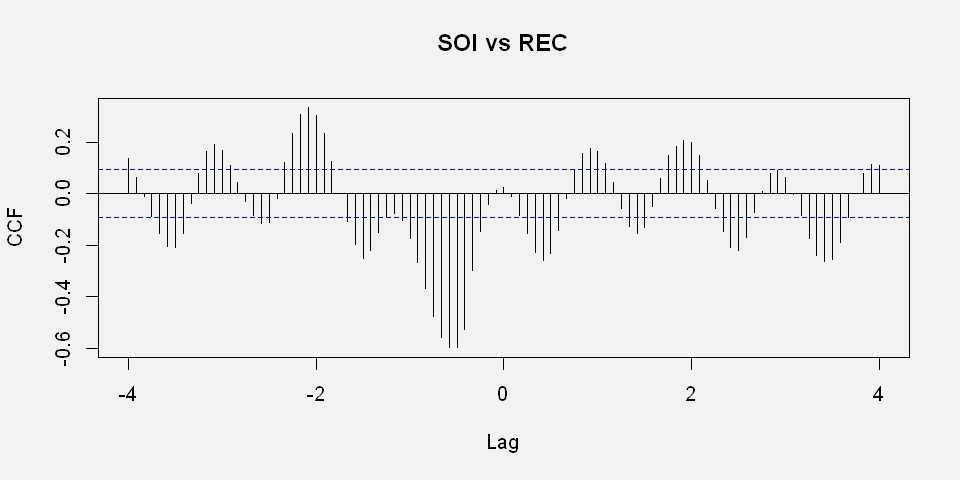

In [20]:
par(bg='gray95')
ccf(soi, rec, 48, main='SOI vs REC', ylab='CCF')

The cross-correlation function peaks at h = −6, showing that the SOI measured at time t − 6 months is associated with the Recruitment series at time t. We could say the SOI leads the Recruitment series by six months. The sign of the ACF is negative, leading to the conclusion that the two series move in different directions; that is, increases in SOI lead to decreases in Recruitment and vice versa. Again, note the periodicity of 12 months in the CCF.
### Grid of scatterplots of Cross-correlation plot
As before, a good visualization of the cross-correlation in SOI Index with REC is to plot the 2D points of REC vs SOI shifted a lag. In This visualization, we can see clearly, which SOI lag are best correlated with the REC time serious.


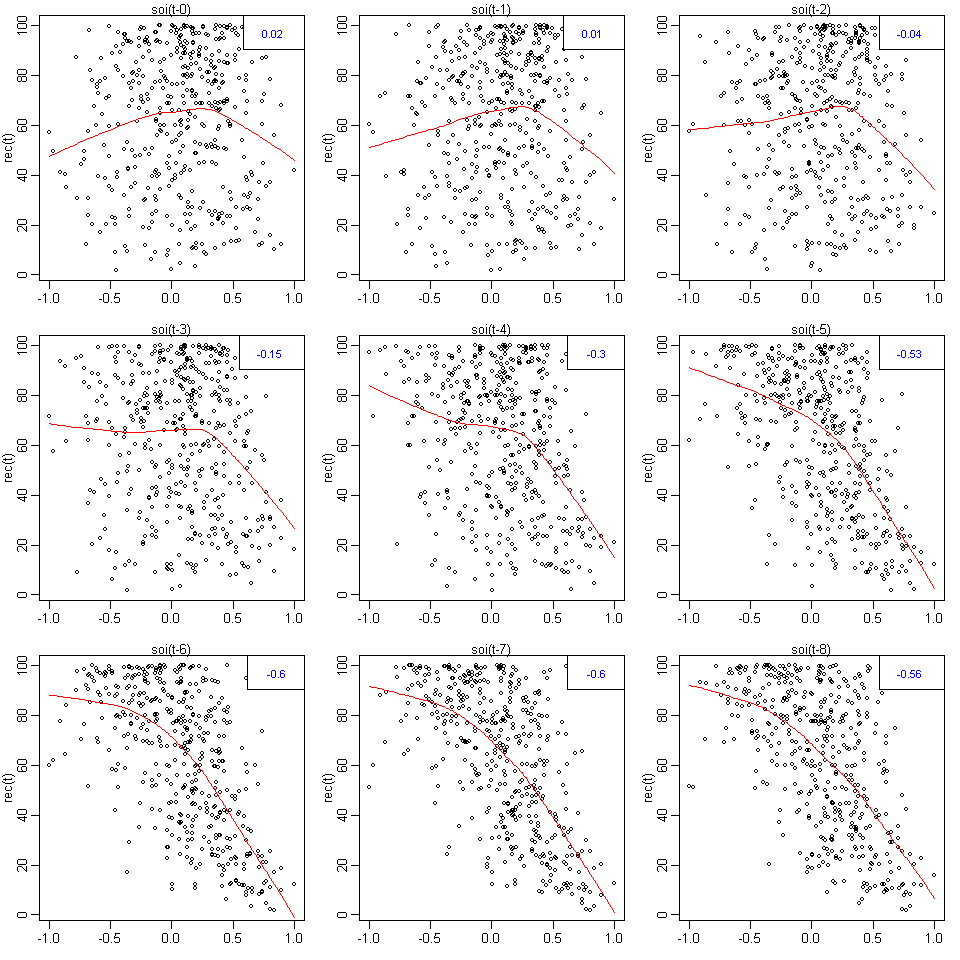

In [21]:
options(repr.plot.height = 8, repr.plot.width = 8)
lag2.plot (soi, rec, 8)

We see here that SOI lags t-5,t-6,t-7 and t-8 are best correlated to REC. So we will try to fit linear combination of those SOI lags to REC series.
Fit result  is:


In [22]:
soilag5=lag(soi,-5)
soilag6=lag(soi,-6)
soilag7=lag(soi,-7)
soilag8=lag(soi,-8)
tryit3 = lm(rec~ soilag5+soilag6+soilag7+soilag8, data = alldata)
summary (tryit3)

ERROR: Error in is.data.frame(data): object 'alldata' not found


## Visualize the results
Lest plot REC with:
#### f = 67.9591-19.1708 *soilag5-15.6893*soilag6 -13.3782*soilag7-23.1372*soilag8.


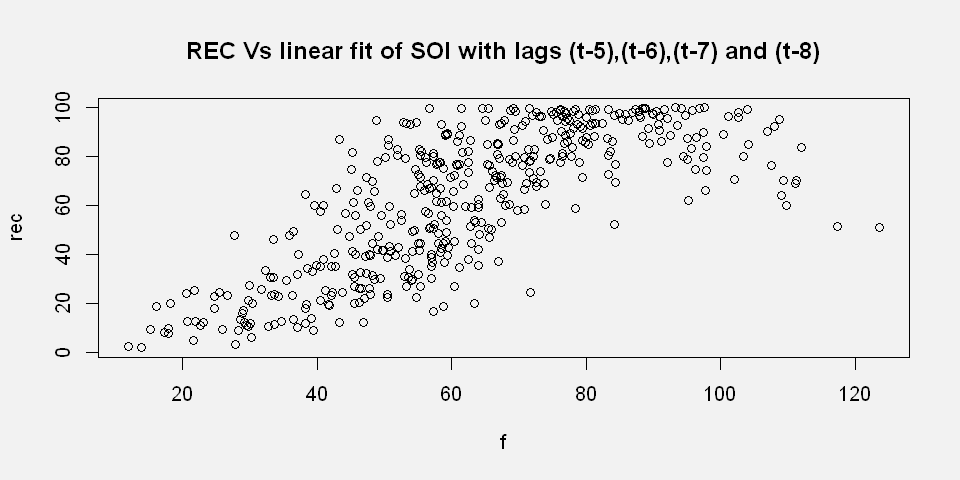

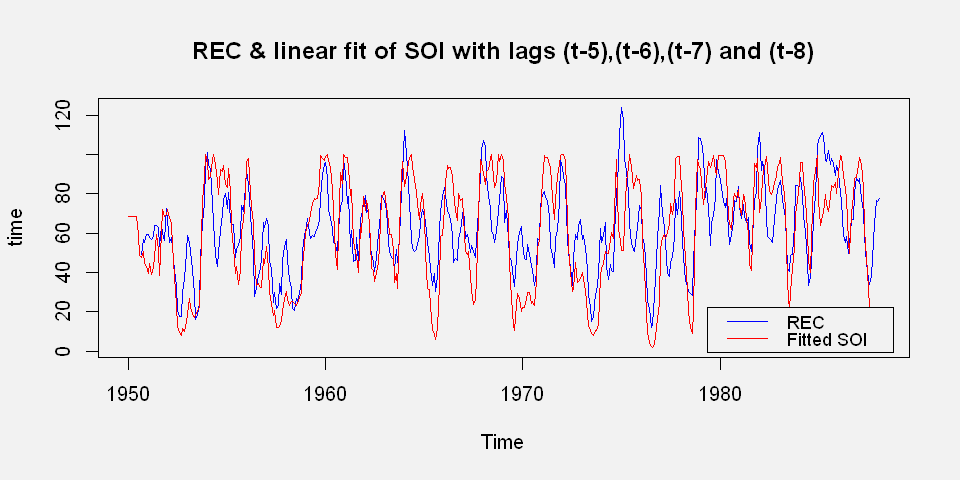

In [26]:
options(repr.plot.height = 4, repr.plot.width = 8)
f = 67.9591-19.1708 *soilag5-15.6893*soilag6 -13.3782*soilag7-23.1372*soilag8
par(bg='grey95')
plot(f,rec, main='REC Vs linear fit of SOI with lags (t-5),(t-6),(t-7) and (t-8)')
ts.plot(f, rec, 
        gpars = list(col = c("blue", "red")), 
        main='REC & linear fit of SOI with lags (t-5),(t-6),(t-7) and (t-8)',
       ylab='time')
legend("bottomright", c("REC","Fitted SOI"),
       col=c('blue','red'),cex=0.9,
       lty=c(1,1),lwd=c(1,1),y.intersp = 1.8, inset=.02)

In [27]:
f = 67.9591-19.1708 *soilag5-15.6893*soilag6 -13.3782*soilag7-23.1372*soilag8

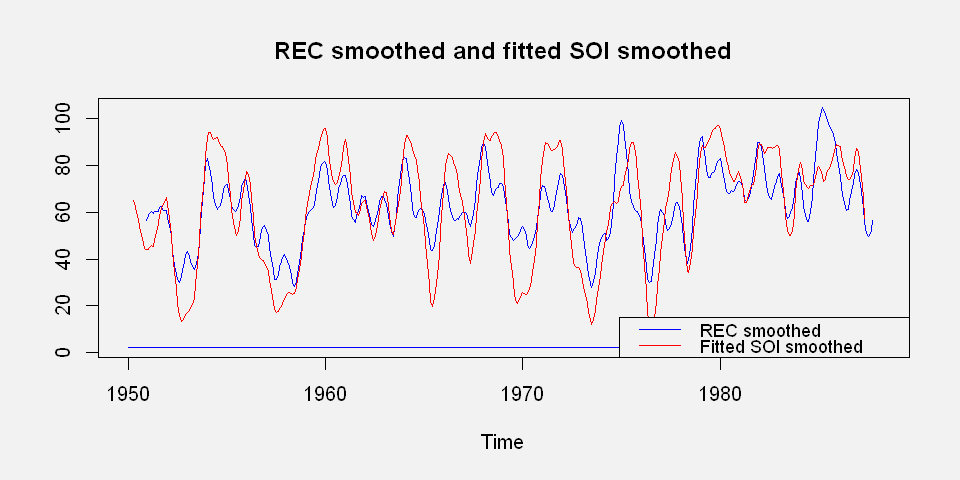

In [28]:

par(bg='grey95')

filtersoi<-filter(f, sides=2, rep(1, 8)/8)
filterrec<-filter(rec, sides=2, rep(1, 8)/8)
ts.plot(filtersoi, filterrec, 
        gpars = list(col = c("blue", "red")), cex=2,
        main='REC smoothed and fitted SOI smoothed')
legend("bottomright", c("REC smoothed","Fitted SOI smoothed"),
       col=c('blue','red'),cex=0.9,
       lty=c(1,1),lwd=c(1,1),y.intersp = 1.6)#, inset=.02)